# CONEXIONES E IMPORTACIONES

In [2]:
# Para tratamiento de datos
import pandas as pd
import numpy as np

# Para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None) 

# Gestión de warnings 
# A diferencia de las excepciones (que detienen el programa), las advertencias solo imprimen un mensaje en la consola y permiten que el código siga ejecutándose.
import warnings
warnings.filterwarnings("ignore")

df_activity = pd.read_csv("./dataset/Customer_Flight_Activity.csv")
df_loyalty = pd.read_csv("./dataset/Customer_Loyalty_History.csv")

# Exploración

## Exploración df_activity

In [3]:
# Información general del DF. 405624 entradas, 9 columnas.
df_activity.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [4]:
df_activity.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [5]:
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [7]:
# Se localizan muchos duplicados en la columna de "Loyalty Number".
# Damos por hecho que cada registro en el DF corresponde a una actividad distinta del cliente, por lo que en este caso no eliminamos duplicados.
df_activity["Loyalty Number"].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

## Exploración df_loyalty

In [8]:
# Información general del DF. 16737 entradas, 15 columnas.
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [9]:
# Se encuentran valores nulos en fecha de cancelación de membresía (no conviene eliminarlas ya que supone que el cliente sigue siendo miembro). 
# Bastantes datos de salario anual vacíos. Lo necesitaremos para análisis, por lo que se tratarán más adelante.
df_loyalty.isnull().sum() 

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [10]:
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [11]:
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [12]:
# No se localizan duplicados.
df_loyalty["Loyalty Number"].value_counts()

Loyalty Number
480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: count, Length: 16737, dtype: int64

# Unión y Limpieza

In [13]:
# Unimos ambos dataframes usando la columna "Loyalty Number"
df_union = df_activity.merge(df_loyalty, left_on= "Loyalty Number", right_on= "Loyalty Number")
df_union

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [14]:
# Homogeneizamos los nombres de las columnas, cambiando a minúsculas y reemplazando espacios por guiones bajos
nuevas_columnas = {}

for col in df_union.columns:
    nuevas_columnas[col] = col.lower().replace(" ", "_")

nuevas_columnas

df_union.rename(columns = nuevas_columnas, inplace = True)
df_union.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [15]:
# De cara al análsis, es interesante unir las columnas de año y mes tanto en inscripción como en cancelación en la membresía.
# Al haber nulos en la fecha de cancelación, se crea una nueva columna de "status" para identificarlos y de cara al análsis se puedan filtrar fácilmente.

df_union["enrollment_date"] = pd.to_datetime({
    'year': df_union['enrollment_year'],
    'month': df_union['enrollment_month'],
    'day': 1
})
df_union["cancellation_date"] = pd.to_datetime({
    'year': df_union['cancellation_year'],
    'month': df_union['cancellation_month'],
    'day': 1
})
df_union["status"]= np.where(df_union["cancellation_date"].isnull(), "Active", "Cancelled")

# Eliminamos las columnas de años y meses ya que tenemos las fechas completas.
columnas_borrar = ["enrollment_year", "enrollment_month", "cancellation_year", "cancellation_month"]
df_union.drop(columns=columnas_borrar, inplace=True)

In [16]:
df_union.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,status
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016-08-01,NaT,Active
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013-03-01,NaT,Active
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016-07-01,NaT,Active
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015-08-01,NaT,Active
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014-01-01,NaT,Active


In [17]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loyalty_number               405624 non-null  int64         
 1   year                         405624 non-null  int64         
 2   month                        405624 non-null  int64         
 3   flights_booked               405624 non-null  int64         
 4   flights_with_companions      405624 non-null  int64         
 5   total_flights                405624 non-null  int64         
 6   distance                     405624 non-null  int64         
 7   points_accumulated           405624 non-null  float64       
 8   points_redeemed              405624 non-null  int64         
 9   dollar_cost_points_redeemed  405624 non-null  int64         
 10  country                      405624 non-null  object        
 11  province                  

In [57]:
# se localizan valores negativos en la columna de salario. Representa un 0.1% aprox del total, por lo que ignoramos esos registros.
df_final = df_union[df_union['salary'] >= 0] 
df_final.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_date,cancellation_date,status
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016-08-01,NaT,Active
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015-08-01,NaT,Active
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014-01-01,NaT,Active
5,100301,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.0,Divorced,Nova,48356.96,Standard,2013-09-01,NaT,Active
6,100364,2017,1,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.0,Married,Nova,5143.88,Standard,2015-05-01,NaT,Active


# Análisis Estadístico

Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.

In [20]:
df_final.describe().T

,count,mean,min,25%,50%,75%,max,std
loyalty_number,302472.0,550344.081012,100018.0,325830.0,551828.0,773986.0,999986.0,260156.07233
year,302472.0,2017.5,2017.0,2017.0,2017.5,2018.0,2018.0,0.500001
month,302472.0,6.5,1.0,3.75,6.5,9.25,12.0,3.452058
flights_booked,302472.0,4.102839,0.0,0.0,1.0,8.0,21.0,5.219507
flights_with_companions,302472.0,1.027903,0.0,0.0,0.0,1.0,11.0,2.072468
total_flights,302472.0,5.130743,0.0,0.0,1.0,10.0,32.0,6.512201
distance,302472.0,1206.977595,0.0,0.0,474.0,2332.0,6293.0,1433.39119
points_accumulated,302472.0,123.539604,0.0,0.0,48.6,239.0,676.5,146.671364
points_redeemed,302472.0,30.510626,0.0,0.0,0.0,0.0,876.0,125.082367
dollar_cost_points_redeemed,302472.0,2.469409,0.0,0.0,0.0,0.0,71.0,10.117321


## Análisis de variables numéricas

In [21]:
# Salario anual

media_salario = df_final["salary"].mean().round(0)
mediana_salario = df_final["salary"].median()
moda_salario = df_final["salary"].mode()[0]
desviacion_estandar_salario = df_final["salary"].std()
rango_salario = df_final["salary"].max() - df_final["salary"].min()
maximo_salario = df_final["salary"].max()
minimo_salario = df_final["salary"].min()
cv_salario = (desviacion_estandar_salario / media_salario *100).round(0)

print(f"Media salario: {media_salario}")
print(f"Mediana salario: {mediana_salario}")
print(f"Moda salario: {moda_salario}")
print(f"Desviación estándar de salarios: {desviacion_estandar_salario:.2f}")
print(f"Rango de salarios: {rango_salario}")
print(f"Salario mínimo: {minimo_salario}")
print(f"Salario máximo: {maximo_salario}")
print(f"Coeficiente de variación en salario: {cv_salario}%")
print("---")
print("Análisis: se observa que la mediana y la media se posicionan relativamente cerca entre ellas. \nSin embargo, el valor máximo sugiere presencia de outliers que aumentan la media.")

Media salario: 79451.0
Mediana salario: 73523.0
Moda salario: 101933.0
Desviación estándar de salarios: 34713.92
Rango de salarios: 391619.0
Salario mínimo: 15609.0
Salario máximo: 407228.0
Coeficiente de variación en salario: 44.0%
---
Análisis: se observa que la mediana y la media se posicionan relativamente cerca entre ellas. 
Sin embargo, el valor máximo sugiere presencia de outliers que aumentan la media.


In [22]:
# Customer Lifetime Value (CLV)
media_clv = df_final["clv"].mean().round(2)
mediana_clv = df_final["clv"].median()
moda_clv = df_final["clv"].mode()[0].round(2)
desviacion_estandar_clv = df_final["clv"].std()
rango_clv = df_final["clv"].max() - df_final["clv"].min()
maximo_clv = df_final["clv"].max()
minimo_clv = df_final["clv"].min()
cv_clv = desviacion_estandar_clv / media_clv *100

print(f"Media CLV: {media_clv}")
print(f"Mediana CLV: {mediana_clv}")
print(f"Moda CLV: {moda_clv}")
print(f"Desviación estándar de CLV: {desviacion_estandar_clv:.2f}")
print(f"Rango de CLV: {rango_clv}")
print(f"CLV Mínimo: {minimo_clv}")
print(f"CLV Máximo: {maximo_clv}")
print(f"Coeficiente de variación en CLV: {cv_clv:.2f}%")

Media CLV: 8130.31
Mediana CLV: 5809.26
Moda CLV: 3873.65
Desviación estándar de CLV: 6955.04
Rango de CLV: 81205.49
CLV Mínimo: 2119.89
CLV Máximo: 83325.38
Coeficiente de variación en CLV: 85.54%


In [23]:
# Vuelos totales
media_total_flights = df_final["total_flights"].mean().round(2)
mediana_total_flights = df_final["total_flights"].median()
moda_total_flights = df_final["total_flights"].mode()[0].round(2)
desviacion_estandar_total_flights = df_final["total_flights"].std()
rango_total_flights = df_final["total_flights"].max() - df_final["total_flights"].min()
maximo_total_flights = df_final["total_flights"].max()
minimo_total_flights = df_final["total_flights"].min()
cv_total_flights = desviacion_estandar_total_flights / media_total_flights * 100

print(f"Media vuelos totales: {media_total_flights}")
print(f"Mediana vuelos totales: {mediana_total_flights}")
print(f"Moda vuelos totales: {moda_total_flights}")
print(f"Desviación estándar de vuelos totales: {desviacion_estandar_total_flights:.2f}")
print(f"Rango de vuelos totales: {rango_total_flights}")
print(f"Mínimo vuelos totales: {minimo_total_flights}")
print(f"Máximo vuelos totales: {maximo_total_flights}")
print(f"Coeficiente de variación en vuelos totales: {cv_total_flights:.2f}%")
print("---")
print("Análisis: se observa que la mediana de vuelos es 1 pero el máximo es 32; lo que indica que estos clientes podrían ser outliers que empujan la media hacia arriba.")

Media vuelos totales: 5.13
Mediana vuelos totales: 1.0
Moda vuelos totales: 0
Desviación estándar de vuelos totales: 6.51
Rango de vuelos totales: 32
Mínimo vuelos totales: 0
Máximo vuelos totales: 32
Coeficiente de variación en vuelos totales: 126.94%
---
Análisis: se observa que la mediana de vuelos es 1 pero el máximo es 32; lo que indica que estos clientes podrían ser outliers que empujan la media hacia arriba.


In [24]:
# Distancia
media_distance = df_final["distance"].mean().round(2)
mediana_distance = df_final["distance"].median()
moda_distance = df_final["distance"].mode()[0].round(2)
desviacion_estandar_distance = df_final["distance"].std()
rango_distance = df_final["distance"].max() - df_final["distance"].min()
maximo_distance = df_final["distance"].max()
minimo_distance = df_final["distance"].min()
cv_distance = desviacion_estandar_distance / media_distance * 100

print(f"Media distancia: {media_distance}")
print(f"Mediana distancia: {mediana_distance}")
print(f"Moda distancia: {moda_distance}")
print(f"Desviación estándar de distancia: {desviacion_estandar_distance:.2f}")
print(f"Rango de distancia: {rango_distance}")
print(f"Distancia mínima: {minimo_distance}")
print(f"Distancia máxima: {maximo_distance}")
print(f"Coeficiente de variación en distancia: {cv_distance:.2f}%")

Media distancia: 1206.98
Mediana distancia: 474.0
Moda distancia: 0
Desviación estándar de distancia: 1433.39
Rango de distancia: 6293
Distancia mínima: 0
Distancia máxima: 6293
Coeficiente de variación en distancia: 118.76%


In [25]:
# Puntos acumulados
media_points_accumulated = df_final["points_accumulated"].mean().round(2)
mediana_points_accumulated = df_final["points_accumulated"].median()
moda_points_accumulated = df_final["points_accumulated"].mode()[0].round(2)
desviacion_estandar_points_accumulated = df_final["points_accumulated"].std()
rango_points_accumulated = df_final["points_accumulated"].max() - df_final["points_accumulated"].min()
maximo_points_accumulated = df_final["points_accumulated"].max()
minimo_points_accumulated = df_final["points_accumulated"].min()
cv_points_accumulated = desviacion_estandar_points_accumulated / media_points_accumulated * 100

print(f"Media puntos acumulados: {media_points_accumulated}")
print(f"Mediana puntos acumulados: {mediana_points_accumulated}")
print(f"Moda puntos acumulados: {moda_points_accumulated}")
print(f"Desviación estándar de puntos acumulados: {desviacion_estandar_points_accumulated:.2f}")
print(f"Rango de puntos acumulados: {rango_points_accumulated}")
print(f"Mínimo puntos acumulados: {minimo_points_accumulated}")
print(f"Máximo puntos acumulados: {maximo_points_accumulated}")
print(f"Coeficiente de variación en puntos acumulados: {cv_points_accumulated:.2f}%")

Media puntos acumulados: 123.54
Mediana puntos acumulados: 48.6
Moda puntos acumulados: 0.0
Desviación estándar de puntos acumulados: 146.67
Rango de puntos acumulados: 676.5
Mínimo puntos acumulados: 0.0
Máximo puntos acumulados: 676.5
Coeficiente de variación en puntos acumulados: 118.72%


In [26]:
# Puntos canjeados
media_points_redeemed = df_final["points_redeemed"].mean().round(2)
mediana_points_redeemed = df_final["points_redeemed"].median()
moda_points_redeemed = df_final["points_redeemed"].mode()[0].round(2)
desviacion_estandar_points_redeemed = df_final["points_redeemed"].std()
rango_points_redeemed = df_final["points_redeemed"].max() - df_final["points_redeemed"].min()
maximo_points_redeemed = df_final["points_redeemed"].max()
minimo_points_redeemed = df_final["points_redeemed"].min()
cv_points_redeemed = desviacion_estandar_points_redeemed / media_points_redeemed * 100

print(f"Media puntos canjeados: {media_points_redeemed}")
print(f"Mediana puntos canjeados: {mediana_points_redeemed}")
print(f"Moda puntos canjeados: {moda_points_redeemed}")
print(f"Desviación estándar de puntos canjeados: {desviacion_estandar_points_redeemed:.2f}")
print(f"Rango de puntos canjeados: {rango_points_redeemed}")
print(f"Mínimo puntos canjeados: {minimo_points_redeemed}")
print(f"Máximo puntos canjeados: {maximo_points_redeemed}")
print(f"Coeficiente de variación en puntos canjeados: {cv_points_redeemed:.2f}%")

print("---")
print("Análisis: se observa que la mediana es 0; significa que más de la mitad de los clientes no han canjeado puntos. \nSin embargo el máximo de puntos canjeados es muy alto, lo que sugiere que quien canjea lo hace en grandes cantidades.")

Media puntos canjeados: 30.51
Mediana puntos canjeados: 0.0
Moda puntos canjeados: 0
Desviación estándar de puntos canjeados: 125.08
Rango de puntos canjeados: 876
Mínimo puntos canjeados: 0
Máximo puntos canjeados: 876
Coeficiente de variación en puntos canjeados: 409.97%
---
Análisis: se observa que la mediana es 0; significa que más de la mitad de los clientes no han canjeado puntos. 
Sin embargo el máximo de puntos canjeados es muy alto, lo que sugiere que quien canjea lo hace en grandes cantidades.


In [27]:
# correlacion entre vuelos totales y distancia recorrida.

df_final[["total_flights", "distance"]].corr()

# Se aproxima al 1, lo que indica correlación positiva.
# Si alguien vuela más, acumula más distancia durante el mes del registro

,total_flights,distance
total_flights,1.000000,0.779873
distance,0.779873,1.000000


In [28]:
# correlacion entre vuelos totales y puntos acumulados.

df_final[["total_flights", "points_accumulated"]].corr()

# Se aproxima al 1, lo que indica correlación positiva.
# A más viajes, más puntos acumulados.

,total_flights,points_accumulated
total_flights,1.000000,0.771786
points_accumulated,0.771786,1.000000


In [29]:
## prueba si los clientes casados acumulan más puntos que los solteros
df_final[["flights_with_companions", "points_accumulated"]].corr()

,flights_with_companions,points_accumulated
flights_with_companions,1.000000,0.511533
points_accumulated,0.511533,1.000000


In [30]:
# correlacion entre vuelos totales y puntos canjeados.

df_final[["points_accumulated", "points_redeemed"]].corr()

# Baja correlación. Quien gana puntos pocas veces los canjea.

,points_accumulated,points_redeemed
points_accumulated,1.000000,0.223244
points_redeemed,0.223244,1.000000


In [46]:
# correlacion entre salario y clv.

df_loyalty[["Salary", "CLV"]].corr()

# Valor negativo. Correlación negativa.
# A priori, el salario no sería un indicador que indique cuánto valor aporta un cliente a la empresa. El salario no garantiza lealtad a la aerolínea.

,Salary,CLV
Salary,1.000000,-0.021947
CLV,-0.021947,1.000000


## Análisis de variables categóricas

En este análisis específico, usamos "df_loyalty" para ignorar los duplicados, ya que los ID se repiten en df_final. 

Cada registro en "df_total" supone la actividad de un cliente durante un mes específico por lo que, aunque duplicados, son registros valiosos.

In [44]:
df_final["loyalty_card"].value_counts()

loyalty_card
Star      132960
Nova      105072
Aurora     64440
Name: count, dtype: int64

In [ ]:
df_loyalty["Loyalty Card"].value_counts()


## Se observa una diferencia clara entre ambos DF. Se da validez realmente a la última (df_loyalty), 
# ya que en df_final los ID se repiten y no se puede garantizar la veracidad de los datos.

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

In [ ]:
df_loyalty["Education"].value_counts()

# Según esta información, la gran mayoría de los clientes tienen datos universitarios, casi duplicando la suma del resto de datos.

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

In [39]:
df_loyalty["Gender"].value_counts()

#No se observa una diferencia significativa en el sexo de los clientes.

Gender
Female    8410
Male      8327
Name: count, dtype: int64

In [ ]:
df_loyalty["Province"].value_counts()

# Se observa que a más grande es una ciudad, hay más clientes en la base de datos

Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

In [ ]:
df_loyalty["Marital Status"].value_counts(normalize=True) * 100

#Un 58% de la totalidad de los clientes se encuentran legalmente casados.
#El ratio de solteros-divorciados es de poco más del 40%.

Marital Status
Married     58.164546
Single      26.790942
Divorced    15.044512
Name: proportion, dtype: float64

# Visualización

- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

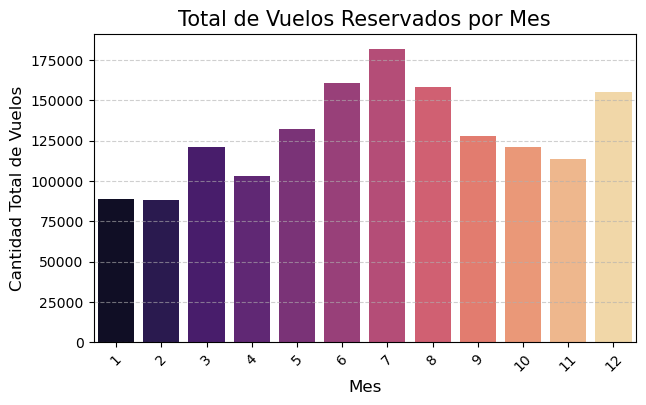

Se observa un pico claro en los meses de verano, coincidiendo con vacaciones. 
También se observa un claro aumento en el mes de diciembre, coincidiendo con época de Navidad


In [83]:
plt.figure(figsize=(7, 4))

# Si quieres ver el total acumulado de todos los años por mes:
sns.barplot(data=df_final, x='month', y='total_flights', palette='magma', estimator=sum, errorbar=None)

plt.title('Total de Vuelos Reservados por Mes', fontsize=15)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad Total de Vuelos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("Se observa un pico claro en los meses de verano, coincidiendo con vacaciones. \nTambién se observa un claro aumento en el mes de diciembre, coincidiendo con época de Navidad")

- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

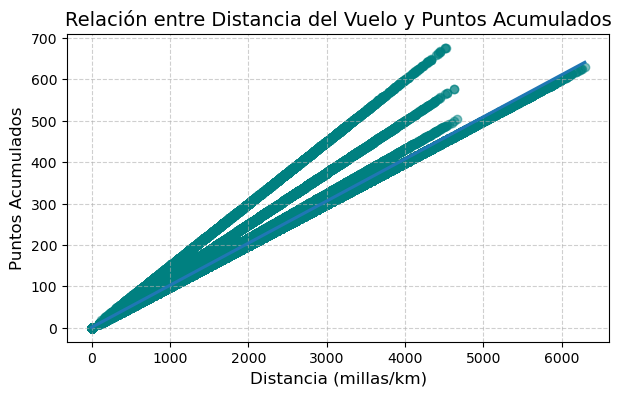

En este gráfico observamos lo ya comentado anteriormente: a mayor distancia de vuelo, mayor es la cantidad de puntos acumulados. 
Sin embargo, podemos observar cuatro tipos de tendencias en la sumatoria de puntos, probablemente relacionado con el tipo de 'loyalty_card' que posea cada cliente.


In [82]:
plt.figure(figsize=(7, 4))

# scatter_kws ajusta los puntos, line_kws muestra una línea de tendencia
sns.regplot(data=df_final, x='distance', y='points_accumulated', 
            scatter_kws={'alpha':0.5, 'color':'teal'})

plt.title('Relación entre Distancia del Vuelo y Puntos Acumulados', fontsize=14)
plt.xlabel('Distancia (millas/km)', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("En este gráfico observamos lo ya comentado anteriormente: a mayor distancia de vuelo, mayor es la cantidad de puntos acumulados. \nSin embargo, podemos observar cuatro tipos de tendencias en la sumatoria de puntos, probablemente relacionado con el tipo de 'loyalty_card' que posea cada cliente.")

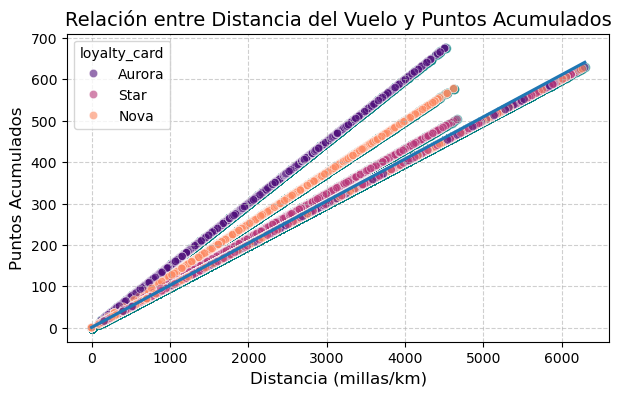

En este gráfico confirmamos la hipótesis anterior: cada 'loyalty_card' tiene una tendencia distinta en la acumulación de puntos. 
La distancia, no es el único factor que determina los puntos. 
 Sin embargo, hay una cuarta línea de relación que sugiere que hay otra variable que afecta directamente en los puntos acumulados y no es la distancia de vuelo. Podrían ser los meses de vuelo o el canjeo de puntos. Debemos hacer una búsqueda más profunda de los posibles motivos.


In [84]:
plt.figure(figsize=(7, 4))

# scatter_kws ajusta los puntos, line_kws muestra una línea de tendencia
sns.regplot(data=df_final, x='distance', y='points_accumulated', 
            scatter_kws={'alpha':0.5, 'color':'teal'})

sns.scatterplot(data=df_final, x='distance', y='points_accumulated', 
                hue='loyalty_card', palette='magma', alpha=0.6)

plt.title('Relación entre Distancia del Vuelo y Puntos Acumulados', fontsize=14)
plt.xlabel('Distancia (millas/km)', fontsize=12)
plt.ylabel('Puntos Acumulados', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("En este gráfico confirmamos la hipótesis anterior: cada 'loyalty_card' tiene una tendencia distinta en la acumulación de puntos. \nLa distancia, no es el único factor que determina los puntos. \n Sin embargo, hay una cuarta línea de relación que sugiere que hay otra variable que afecta directamente en los puntos acumulados y no es la distancia de vuelo. Podrían ser los meses de vuelo o el canjeo de puntos. Debemos hacer una búsqueda más profunda de los posibles motivos.")

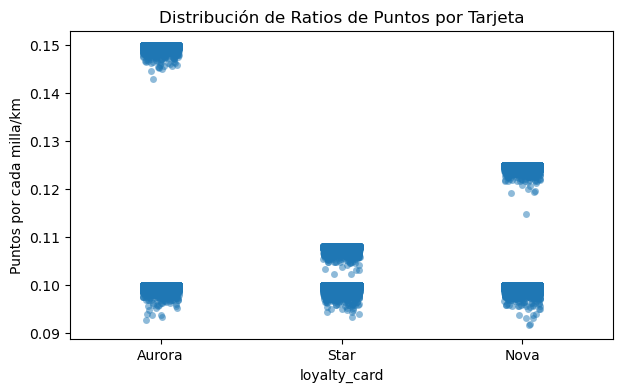

Con este gráfico se observa que, a pesar de que todas las tarjetas de fidelidad tienen un ratio de puntos diferentes, todas tienen puntuaje en común. 
 Muy probablmente podría darse en temporada alta, por ejemplo.


In [85]:
df_final['point_ratio'] = df_final['points_accumulated'] / df_final['distance']

plt.figure(figsize=(7, 4))
sns.stripplot(data=df_final, x='loyalty_card', y='point_ratio', jitter=True, alpha=0.5)

plt.title('Distribución de Ratios de Puntos por Tarjeta')
plt.ylabel('Puntos por cada milla/km')
plt.show()

print("Con este gráfico se observa que, a pesar de que todas las tarjetas de fidelidad tienen un ratio de puntos diferentes, todas tienen puntuaje en común. \n Muy probablmente podría darse en temporada alta, por ejemplo.")

- ¿Cuál es la distribución de los clientes por provincia o estado?

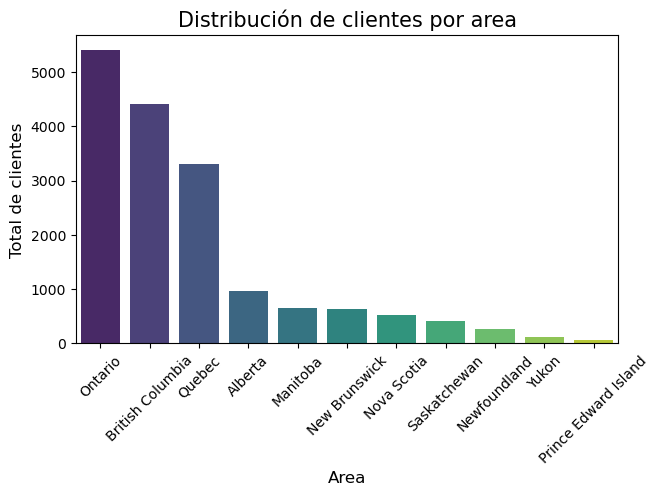

Se observa lo indicado anteriormente en el análisis preliminar: a mayor tamaño de área poblada, mayor cantidad de clientes.


In [91]:
provincia_counts = df_loyalty['Province'].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=provincia_counts.index, y=provincia_counts.values, palette='viridis')

plt.title('Distribución de clientes por area', fontsize=15)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Total de clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("Se observa lo indicado anteriormente en el análisis preliminar: a mayor tamaño de área poblada, mayor cantidad de clientes.")

In [92]:
df_loyalty.groupby('Province')['City'].nunique().sort_values(ascending=False)

# Podemos observar cuántas registros únicos tiene cada provincia. Si bien hay más registros en los grandes, no siempre es así. 
# Se puede advertir con Alberta y Quebec que, a pesar de tener las mismas ciudades, Alberta triplica la cantidad de registros.

Province
Ontario                 7
British Columbia        6
Alberta                 4
Quebec                  4
New Brunswick           2
Manitoba                1
Newfoundland            1
Nova Scotia             1
Prince Edward Island    1
Saskatchewan            1
Yukon                   1
Name: City, dtype: int64

- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

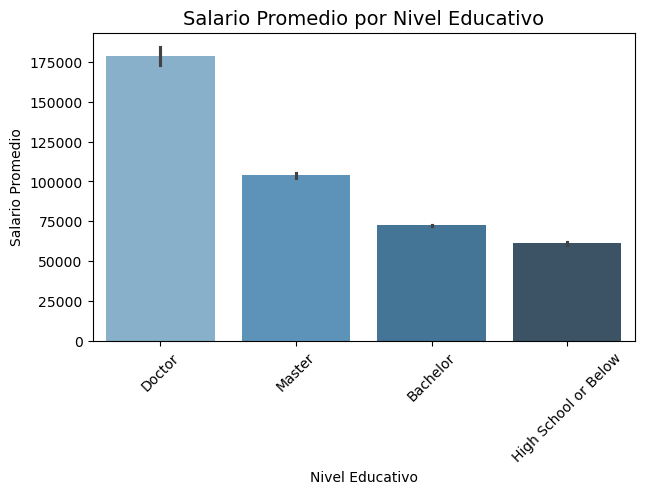

In [97]:
#En este caso, haremos el cálculo de salarios ignorando los datos nulos.
condicion_income = df_loyalty["Salary"].notnull()
df_salary = df_loyalty.loc[condicion_income, :]
df_salary = df_salary[df_salary['Salary'] >= 0] 

orden_salario = df_salary.groupby("Education")["Salary"].mean().sort_values(ascending=False).index

plt.figure(figsize=(7, 4))
sns.barplot(data=df_salary, x="Education", y="Salary", order=orden_salario, palette="Blues_d")

plt.title("Salario Promedio por Nivel Educativo", fontsize=14)
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.xticks(rotation=45)
plt.show()

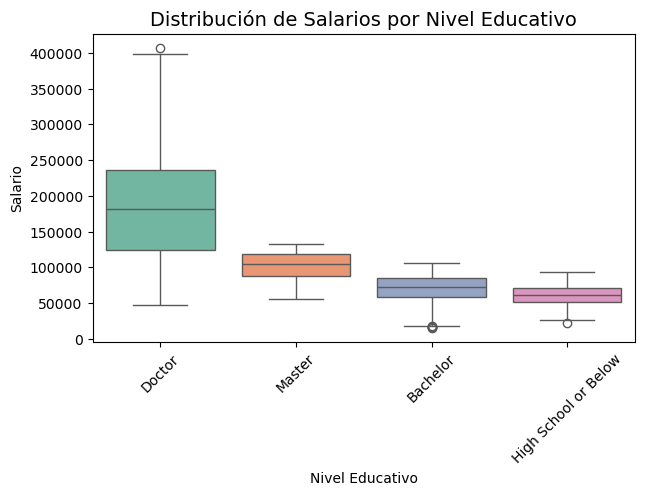

Podemos observar que a mayor nivel educativo, el salario promedio es mayor. 
Sin embargo, podemos ver muchos outliers en el nivel de licenciatura.


In [ ]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df_salary, x="Education", y="Salary", order=orden_salario, palette="Set2")


plt.title("Distribución de Salarios por Nivel Educativo", fontsize=14)
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)
plt.show()

print("En construccion 🚧🚧")

- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

- ¿Cómo se distribuyen los clientes según su estado civil y género?

# Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberás seguir son:
- Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
- Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo.